In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [2]:
df_TFD = pd.read_csv('../../datasets/TitanicFromDIsaster_train.csv')
df_TFD.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_TFD_rel = df_TFD[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_TFD_rel

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
df_TFD_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
# df_TFD_rel.isnull().sum()
df_TFD_rel = df_TFD_rel.dropna()
df_TFD_rel.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# quest (EDA/itanicFromDisaster_train_EDA.ipynb)
- 분석 스토리 작성
- dataset : TitanicFromDIsaster_train.csv
- DDA, EDA 진행
- 설명변수는 연속형, 범주형 섞어서 7개 이상

## 상관관계 확인
- 목표변수 : 'Survived'
- 설명변수 : 
    - 'Pclass'(객실등급) : 1등급객실이 다른 등급 객실에 비해 생존률이 높음.
    - 'Sex'(성별) : 남성보다 여성의 생존률이 비교적 높음.
    - 'Age'(나이) : 젊은 연령이 나이 많은 연령에 비해 생존률이 높음.
    - 'SibSp'(형제와배우자) : 한명이하의 형제와배우자가 다수의 형재와배우자보다 생존률과 사망률이 높음. 
    - 'Parch'(자식과부모) : 애매한 차이지만 자식과 부모가 적을수록 생존률이 비교적 높은것 같음.
    - 'Fare'(요금) : 요금20 을 기준으로 이상 지불한 사람의 생존률이 높음.
    - 'Embarked'(탑승위치) : C라는 곳의 탑승객이 생존률이 비교적 가장 높았음.
- 분석 스토리 : 
    - 'SibSp'(형제와배우자)와 'Parch'(자식과부모)는 사람수별로 전체적인 숫자가 고르지 않기 때문에 사람이 적을수록 생존에 유리하다고 분석하기 어려움.
    - 'Fare'(요금)에서는 요금 30 이상의 자료가 부족하므로 지불을 많이 할수록 유리하다고 판단하기 어려움. 하지만 가격과 'Pclass'(객실등급)과 관계가 있을 것 같으므로 두 변수간에 상관관계를 파악후 추가 분석이 필요함.
    - 탑승위치와 객실등급은 배의 객실위치라는 공통점이 있기 때문에 배의 구조를 먼저 봐야하겠지만 1등급과 탑승위치 C 라는 곳이 생존확률이 가장높았음. 이 자료를 토대로 배의 가장 안전한 지역을 판단할수 있을 것으로 판단됨.
    - 여성이 생존률이 높았고 젊은 연령이 생존률이 높았기 때문에 이것에 대한 이유를 파악할수 있으면 좋은 아이디어를 만들수 있을것으로 판단됨.

<Axes: xlabel='Survived', ylabel='count'>

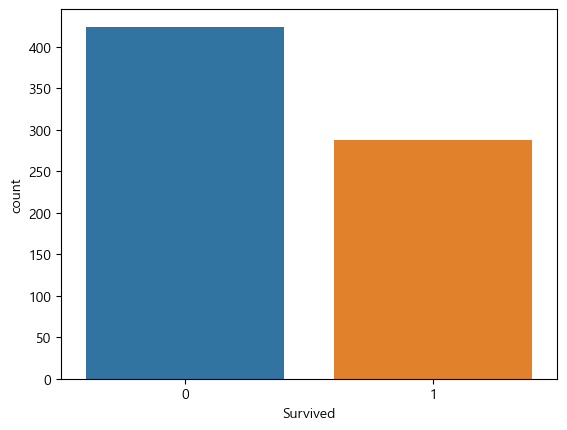

In [7]:
sns.countplot(data=df_TFD_rel, x='Survived')

In [8]:
# df_TFD_rel.describe()
df_TFD_rel[['Survived']] = df_TFD_rel[['Survived']].astype(object)
df_TFD_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    object 
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


C:\Users\01-02\AppData\Local\Temp\ipykernel_10800\1633233792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TFD_rel[['Survived']] = df_TFD_rel[['Survived']].astype(object)


### x:연속형/ y:범주형

In [9]:
forrel_list = df_TFD_rel.describe().columns.to_list()
forrel_list

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

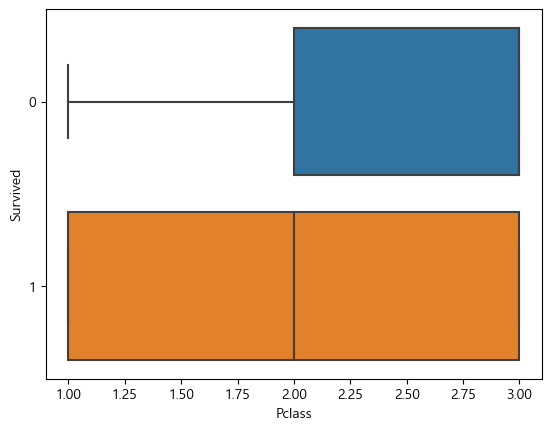

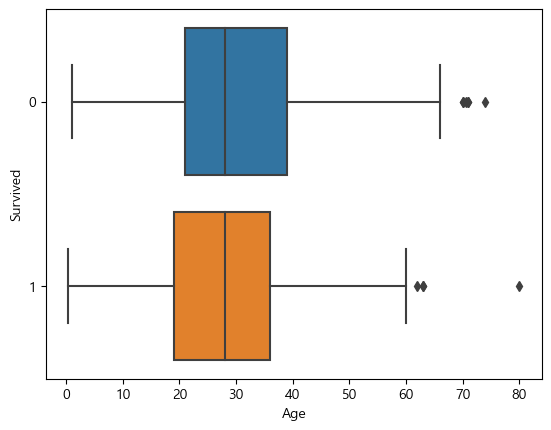

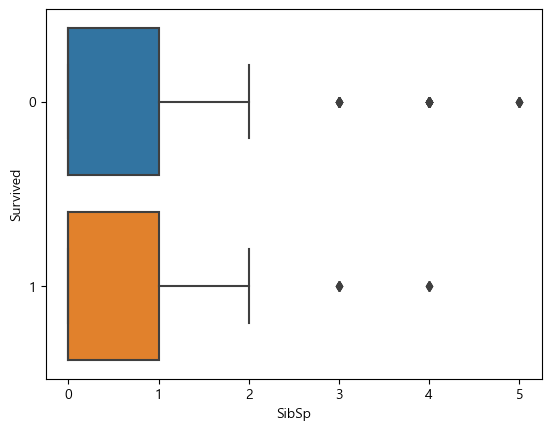

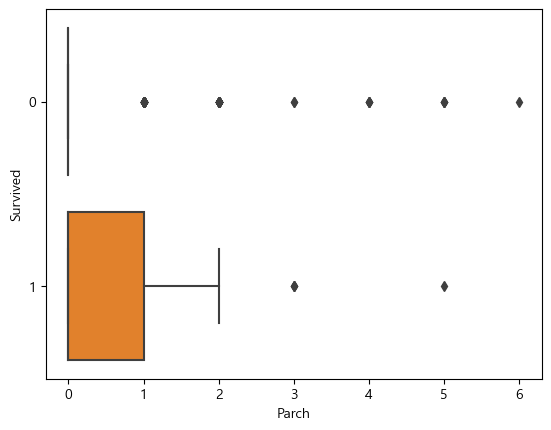

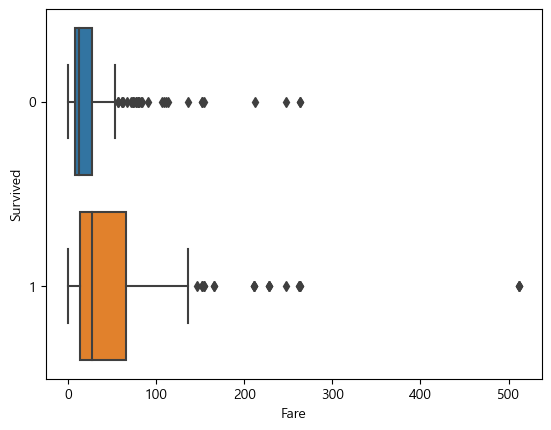

In [10]:
for item in forrel_list :
    sns.boxplot(data=df_TFD_rel, x=item, y='Survived', orient='h')
    plt.show()

#### Age 이상치

In [11]:
Q1 = df_TFD_rel['Age'].describe()['25%']
Q3 = df_TFD_rel['Age'].describe()['75%']
IQR = Q3 - Q1
Q1, Q3, IQR 

(20.0, 38.0, 18.0)

In [12]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up 

(-7.0, 65.0)

In [13]:
condition = (df_TFD_rel['Age'] <= bound_up) 
condition

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Name: Age, Length: 712, dtype: bool

In [14]:
df_TFD_rel_condittion = df_TFD_rel.loc[condition]

<Axes: xlabel='Age', ylabel='Survived'>

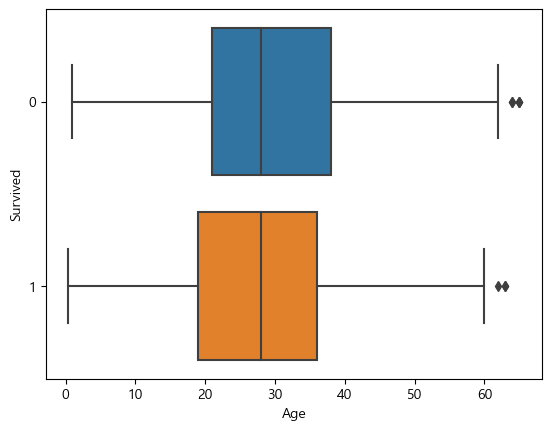

In [15]:
sns.boxplot(data=df_TFD_rel_condittion, x='Age', y='Survived', orient='h')

#### SibSp 이상치

In [16]:
Q1 = df_TFD_rel['SibSp'].describe()['25%']
Q3 = df_TFD_rel['SibSp'].describe()['75%']
IQR = Q3 - Q1
Q1, Q3, IQR 

(0.0, 1.0, 1.0)

In [17]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up 

(-1.5, 2.5)

In [18]:
condition = (df_TFD_rel['SibSp'] <= bound_up) 
condition

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Name: SibSp, Length: 712, dtype: bool

In [19]:
df_TFD_rel_condittion = df_TFD_rel.loc[condition]

<Axes: xlabel='SibSp', ylabel='Survived'>

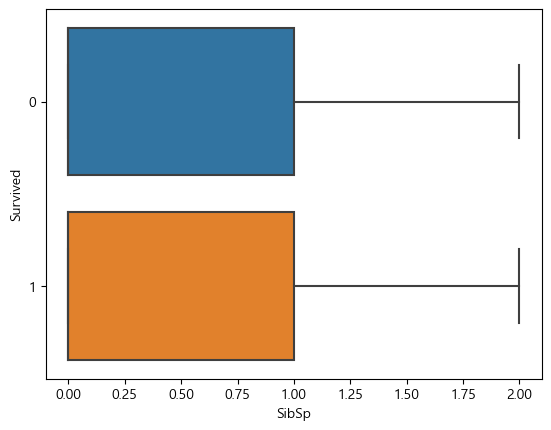

In [20]:
sns.boxplot(data=df_TFD_rel_condittion, x='SibSp', y='Survived', orient='h')

In [21]:
df_TFD_rel['SibSp'].value_counts()

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

#### Parch 다른 차트 
    - 참고 : https://jfun.tistory.com/136

In [22]:
def bar_chart(feature):
    survived = df_TFD_rel[df_TFD_rel['Survived']==1][feature].value_counts()
    dead = df_TFD_rel[df_TFD_rel['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['1','0']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

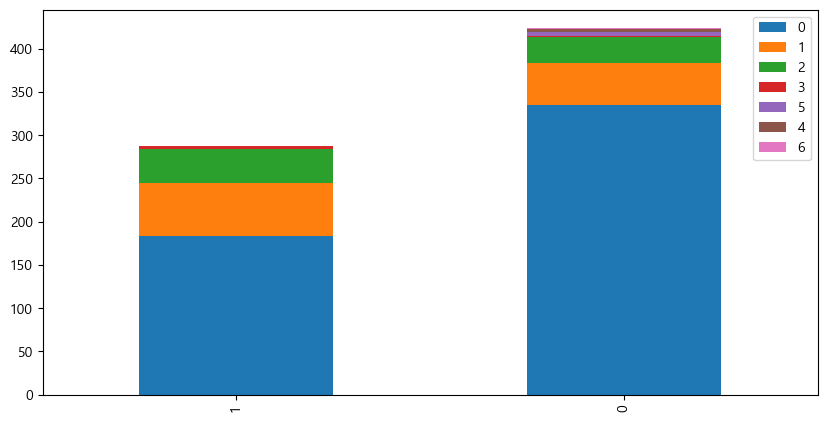

In [23]:
bar_chart('Parch')

In [24]:
# 산 사람 수, 죽은 사람 수
df_TFD_rel[df_TFD_rel['Survived']==1]['Parch'].value_counts(), df_TFD_rel[df_TFD_rel['Survived']==0]['Parch'].value_counts()

(0    184
 1     61
 2     39
 3      3
 5      1
 Name: Parch, dtype: int64,
 0    335
 1     49
 2     29
 5      4
 4      4
 3      2
 6      1
 Name: Parch, dtype: int64)

#### Fare 이상치

In [25]:
Q1 = df_TFD_rel['Fare'].describe()['25%']
Q3 = df_TFD_rel['Fare'].describe()['75%']
IQR = Q3 - Q1
Q1, Q3, IQR 

(8.05, 33.0, 24.95)

In [26]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up 

(-29.374999999999996, 70.425)

In [27]:
condition = (df_TFD_rel['Fare'] <= bound_up) 
condition

0       True
1      False
2       True
3       True
4       True
       ...  
885     True
886     True
887     True
889     True
890     True
Name: Fare, Length: 712, dtype: bool

In [28]:
df_TFD_rel_condittion = df_TFD_rel.loc[condition]

<Axes: xlabel='Fare', ylabel='Survived'>

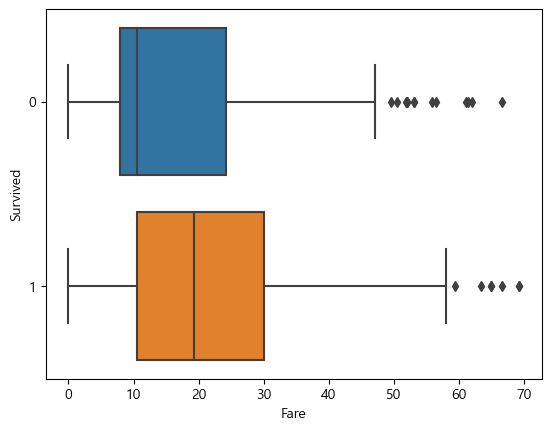

In [29]:
sns.boxplot(data=df_TFD_rel_condittion, x='Fare', y='Survived', orient='h')

### x:범주형/ y:범주형

In [30]:
# df_TFD_rel.drop(columns=['Survived'])
rel_obj_list = df_TFD_rel.describe(include=object).drop(columns=['Survived']).columns.to_list()
rel_obj_list

['Sex', 'Embarked']

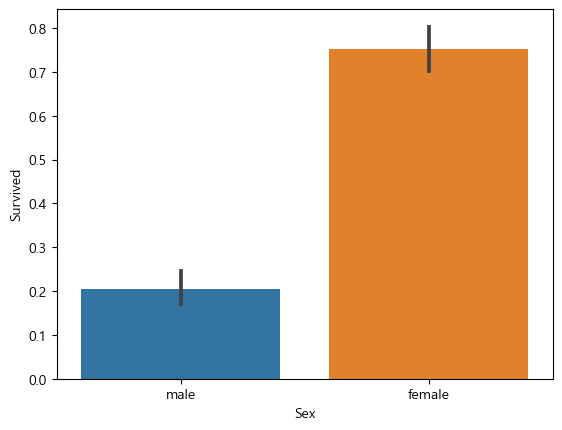

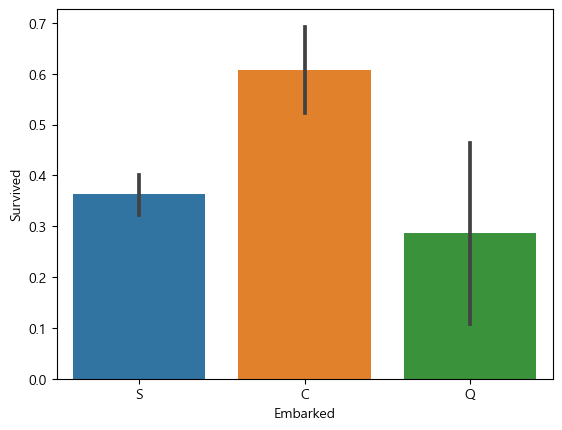

In [31]:
for item in rel_obj_list :
    sns.barplot(data=df_TFD_rel, x=item ,y='Survived' )
    plt.show()

In [32]:
df_TFD_rel['Embarked'].info()

<class 'pandas.core.series.Series'>
Int64Index: 712 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
712 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB
